In [49]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [50]:
portfolio={
    'AAPL':10,
    'TSLA':5,
    'MSFT':15,
    'GOOGL':7,
    'NVDA':10
}
start_date='2023-01-01'
end_date='2025-08-01'
data=yf.download(list(portfolio.keys()),start=start_date,end=end_date)['Close']
data.head()

C:\Users\user\AppData\Local\Temp\ipykernel_13848\1622275537.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data=yf.download(list(portfolio.keys()),start=start_date,end=end_date)['Close']
[*********************100%***********************]  5 of 5 completed


Ticker,AAPL,GOOGL,MSFT,NVDA,TSLA
Date,,,,,
2023-01-03,123.330650,88.588699,234.808960,14.302286,108.099998
2023-01-04,124.602715,87.554909,224.537643,14.735901,113.639999
2023-01-05,123.281334,85.686111,217.882889,14.252333,110.339996
2023-01-06,127.817360,86.819313,220.450714,14.845803,113.059998
2023-01-09,128.339966,87.495262,222.597076,15.614120,119.769997


In [51]:
current_returns=data.pct_change().dropna()
total_value=sum(portfolio[stock]*data[stock].iloc[-1] for stock in portfolio)
weights=np.array([portfolio[stock]*data[stock].iloc[-1]/total_value for stock in portfolio])
portfolio_return=np.dot(weights,current_returns.mean())*252
cov_matrix=current_returns.cov()*252
portfolio_volatility=np.sqrt(np.dot(weights.T,np.dot(cov_matrix,weights)))
portfolio_return,portfolio_volatility,weights

(np.float64(0.43405870611843067),
 np.float64(0.24803093085795694),
 array([0.14066893, 0.10457489, 0.54294003, 0.09113793, 0.12067821]))

In [52]:
benchmark=yf.download('SPY',start=start_date,end=end_date)['Close']
benchmark_return=benchmark.pct_change().dropna()
benchmark_returns=benchmark_return.mean()*252
benchmark_volatility=benchmark_return.std()*np.sqrt(252)
benchmark_returns,benchmark_volatility

C:\Users\user\AppData\Local\Temp\ipykernel_13848\50502709.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  benchmark=yf.download('SPY',start=start_date,end=end_date)['Close']
[*********************100%***********************]  1 of 1 completed


(Ticker
 SPY    0.22379
 dtype: float64,
 Ticker
 SPY    0.158989
 dtype: float64)

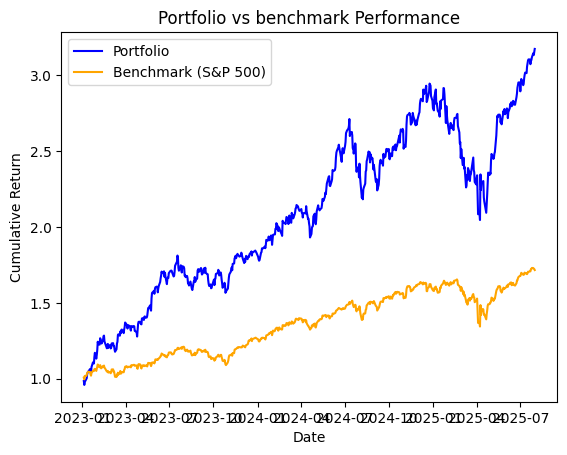

In [53]:
portfolio_cumulative=(current_returns+1).cumprod().dot(weights)
benchmark_cumulative=(benchmark_return+1).cumprod()
plt.plot(portfolio_cumulative.index,portfolio_cumulative,label='Portfolio',color='blue')
plt.plot(benchmark_cumulative.index,benchmark_cumulative,label='Benchmark (S&P 500)',color='orange')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.title('Portfolio vs benchmark Performance')
plt.legend()
plt.show()

In [54]:
potential_assets=["NFLX","AMZN","NVDA"]
potential_data=yf.download(potential_assets,start=start_date,end=end_date)['Close']
potentail_returns=potential_data.pct_change().dropna()
sharpe_ratios={}
for asset in potential_assets:
    combined_returns=pd.concat([current_returns,potentail_returns[asset]],axis=1).dropna()
    new_weights=np.append(weights*(1-0.1),0.1)
    new_expected_return=np.dot(new_weights,combined_returns.mean())*252
    combined_cov_matrix=combined_returns.cov()*252
    new_portfolio_volatility=np.sqrt(np.dot(new_weights.T,
    np.dot(combined_cov_matrix,new_weights)))
    sharpe_ratio=(new_expected_return-0.03)/new_portfolio_volatility
    sharpe_ratios[asset]=sharpe_ratio
best_asset=max(sharpe_ratios,key=sharpe_ratios.get)
best_asset,sharpe_ratios[best_asset]

C:\Users\user\AppData\Local\Temp\ipykernel_13848\3239135098.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  potential_data=yf.download(potential_assets,start=start_date,end=end_date)['Close']
[*********************100%***********************]  3 of 3 completed


('NVDA', np.float64(1.7982949715134926))

In [55]:
sharpe_ratios

{'NFLX': np.float64(1.737429275213415),
 'AMZN': np.float64(1.6402842044142505),
 'NVDA': np.float64(1.7982949715134926)}

<Axes: xlabel='Date'>

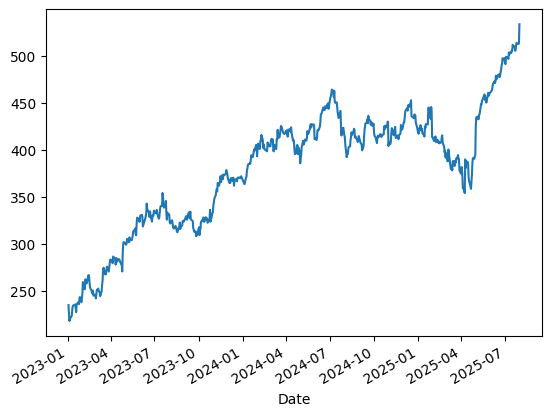

In [56]:
data['MSFT'].plot()

<Axes: xlabel='Date'>

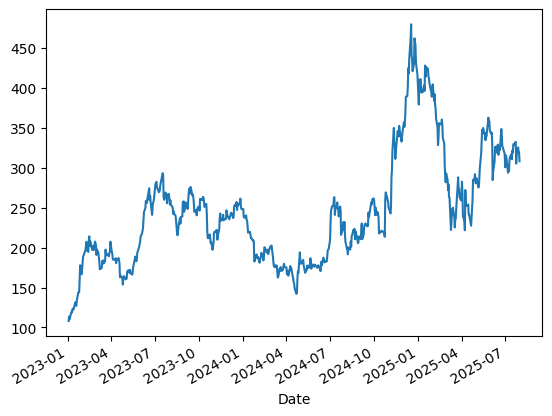

In [57]:
data['TSLA'].plot()